# Predicing Year of Marriage 

## End to End Machine Learning Deployment with Flask-AWS

1. Data Preparation
2. Machine Learning Modelling
3. Model Evaluation
4. Export Trained Model
5. LOCAL REST API with Flask web-server 
6. Create a website for predicing marriage age calling REST API
7. Spin up an EC2 server
8. Configure EC2 with security group and private key
9. Install libraries and dependencies on the EC2 server
10. Move trained model and app.py flask files to EC2 (winscp)
11. Configure flaskapp.wsgi file and Apache vhost file
12. Restart apache webserver and Check API status
13. Launch a website with domain name and host webpage.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
pwd

'C:\\Users\\hp\\Imarticus\\Machine Learning Projects\\Marriage age prediction with Flask-AWS deployment'

In [7]:
df = pd.read_csv("age_of_marriage_data.csv")
df.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


In [10]:
df.shape

(2567, 10)

In [9]:
df.isnull().sum().sort_values(ascending = False)

religion           635
profession         330
mother_tongue      164
location           155
caste              142
height             118
gender              29
age_of_marriage     19
country             16
id                   0
dtype: int64

In [13]:
(df.shape[0] - df.dropna().shape[0])/df.shape[0]

0.24737047136735488

In [14]:
df.dropna(inplace=True) # Not treating missing values since the main purpose is to learn deployment of the model.

In [15]:
df.shape

(1932, 10)

In [16]:
X = df.loc[:,['gender','height','religion','caste','mother_tongue','country']]
y = df.age_of_marriage

In [32]:
X.head()

,gender,height,religion,caste,mother_tongue,country
1,male,"5'7""",Jain,Shwetamber,Gujarati,USA
2,male,"5'7""",Hindu,Brahmin,Hindi,India
3,female,"5'0""",Hindu,Thakur,Hindi,India
4,male,"5'5""",Christian,Born Again,Malayalam,India
5,male,"5'5""",Hindu,Valmiki,Hindi,India


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X.loc[:,['gender','religion','caste','mother_tongue','country']]= \
X.loc[:,['gender','religion','caste','mother_tongue','country']].apply(encoder.fit_transform)

In [36]:
X.head()

,gender,height,religion,caste,mother_tongue,country
1,1,"5'7""",2,34,6,19
2,1,"5'7""",1,14,8,5
3,0,"5'0""",1,36,8,5
4,1,"5'5""",0,13,13,5
5,1,"5'5""",1,38,8,5


In [53]:
int(X.loc[1,'height'].split('\'')[0])*30.48

152.4

In [59]:
int(X.loc[1,'height'].split('\'')[1].replace('"',''))*2.54

17.78

In [62]:
def height_conversion_cms(value):
    return int(value.split('\'')[0])*30.48 + int(value.split('\'')[1].replace('"',''))*2.54

In [63]:
X["height_cms"] = X['height'].apply(height_conversion_cms)

In [64]:
X.head()

,gender,height,religion,caste,mother_tongue,country,height_cms
1,1,"5'7""",2,34,6,19,170.18
2,1,"5'7""",1,14,8,5,170.18
3,0,"5'0""",1,36,8,5,152.40
4,1,"5'5""",0,13,13,5,165.10
5,1,"5'5""",1,38,8,5,165.10


In [66]:
X.drop('height',inplace=True,axis=1)

In [73]:
X.head()

,gender,religion,caste,mother_tongue,country,height_cms
1,1,2,34,6,19,170.18
2,1,1,14,8,5,170.18
3,0,1,36,8,5,152.40
4,1,0,13,13,5,165.10
5,1,1,38,8,5,165.10


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80,max_depth=11)
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)

# Evaluation

In [82]:
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE : ", mean_absolute_error(y_test,y_predict))
r2_score(y_test,y_predict)

MAE :  1.0276089020525403


0.7012153547600277

# Export model

In [83]:
from sklearn.externals import joblib
joblib.dump(rf,'marriage_age_predict_model.ml')

['marriage_age_predict_model.ml']

# Plotting predictions vs actual

In [107]:
a = rf.predict([[1,16,1,6,5,175]])

In [86]:
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
plot_df

,Actual,Predicted
1277,29.0,28.606191
1502,33.0,33.845681
645,30.0,29.792945
1489,28.0,28.694350
2239,30.0,30.254705
...,...,...
351,28.0,29.299540
274,32.0,30.962284
510,29.0,28.167072
601,31.0,28.992366


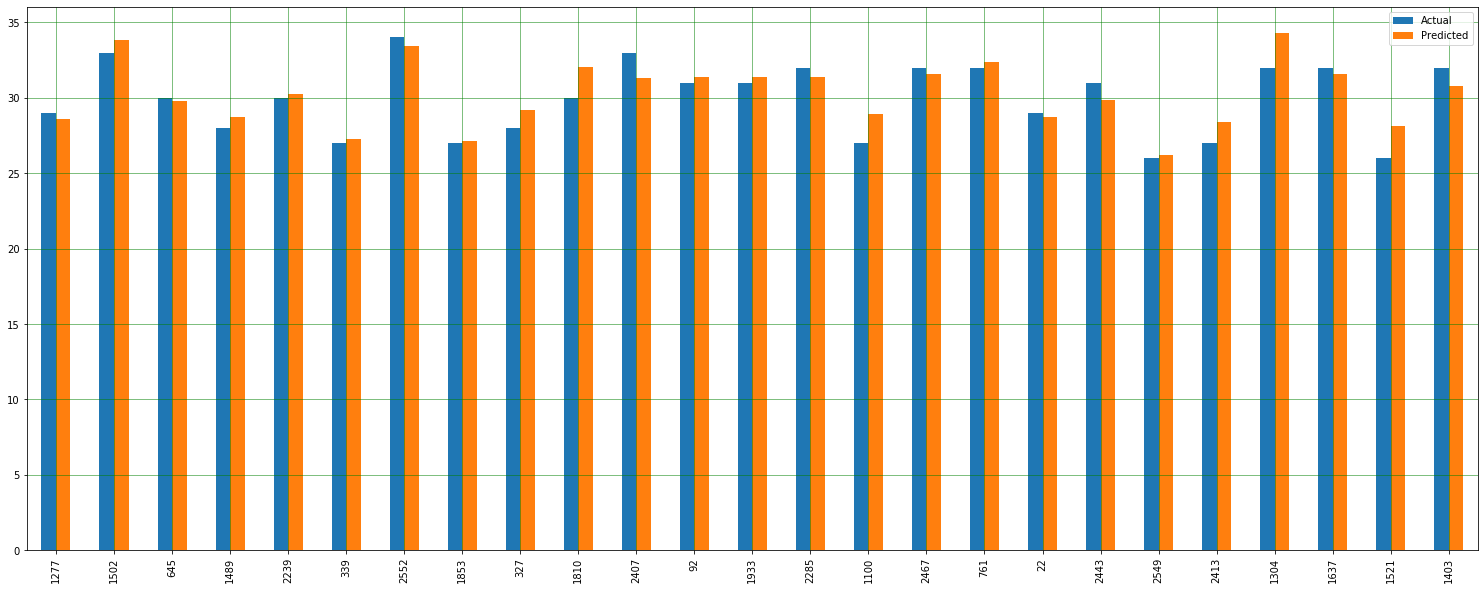

In [89]:
plot_df1 = plot_df.head(25)
plot_df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()